In [1]:
# import library yang dibutuhkan
import os
import re
import math
from spacy.lang.id import Indonesian
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from spacy.lang.id.stop_words import STOP_WORDS

In [2]:
# path berisi lokasi file-file berita
path = "D:/RAIHAN STIS/Perkuliahan/SEMESTER 5/Praktikum INFORMATION RETRIEVAL/Pertemuan (2)/berita"

In [3]:
berita = []
for file_name in sorted(os.listdir(path)):
    file_path = os.path.join(path, file_name)

    with open(file_path, 'r') as f:
        clean_txt = re.sub("http\S+", ' ', f.read())
        clean_txt = re.sub("[^\w\s0-9]|['\d+']|[\'\",.!?:;<>()\[\]{}@#$%^&*=_+/\\\\|~-]]|(\'\')", ' ', clean_txt)
        clean_txt = re.sub("[\n\n]", ' ', clean_txt)
        clean_txt = re.sub(r'\s+', ' ', clean_txt).strip()
        berita.append(clean_txt)

In [4]:
# membuat dictionary yang berisi nomor dokumen dan isinya
doc_dict = {}
for i in range(1, len(berita) + 1):
    words = berita[i - 1].split()
    filtered_words = [word for word in words if word.lower() not in STOP_WORDS]
    stemming = StemmerFactory().create_stemmer()
    stemmed_words = [stemming.stem(word) for word in filtered_words]

    doc_dict[i] = " ".join(stemmed_words)

In [5]:
nlp = Indonesian()
# membuat inverted index
token_arrays = []
for doc in berita:
    text_low = doc.lower()
    nlp_doc = nlp(text_low)
    token_doc = [token.text for token in nlp_doc]
    token_stpwords_tugas = [w for w in token_doc if w not in STOP_WORDS]
    token_arrays.append(token_stpwords_tugas)

In [6]:
inverted_index = {}
for i in range(len(token_arrays)):
    for item in token_arrays[i]:
        item = stemming.stem(item)
        if item not in inverted_index:
            inverted_index[item] = []
        if (item in inverted_index) and ((i+1) not in inverted_index[item]):
            inverted_index[item].append(i+1)

vocab = list(inverted_index.keys())

In [7]:
def termFrequencyInDoc(vocab, doc_dict):
    tf_docs = {}
    for doc_id in doc_dict.keys():
        tf_docs[doc_id] = {}
    for word in vocab:
        for doc_id,doc in doc_dict.items():
            tf_docs[doc_id][word] = doc.count(word)
    return tf_docs

In [8]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens

In [9]:
def wordDocFre(vocab, doc_dict):
  df = {}
  for word in vocab:
    frq = 0
    for doc in doc_dict.values():
      if word in tokenisasi(doc):
        frq = frq + 1
    df[word] = frq
  return df

In [10]:
import numpy as np
def inverseDocFre(vocab,doc_fre,length):
  idf= {}
  for word in vocab:
    idf[word] = idf[word] = 1 + np.log((length + 1) / (doc_fre[word]+1))
  return idf

In [11]:
# vektor space model
def tfidf(vocab,tf,idf_scr,doc_dict):
  tf_idf_scr = {}
  for doc_id in doc_dict.keys():
    tf_idf_scr[doc_id] = {}
  for word in vocab:
    for doc_id,doc in doc_dict.items():
      tf_idf_scr[doc_id][word] = tf[doc_id][word] * idf_scr[word]
  return tf_idf_scr

tf_idf = tfidf(vocab, termFrequencyInDoc(vocab, doc_dict), inverseDocFre(vocab, wordDocFre(vocab, doc_dict), len(doc_dict)), doc_dict)

# Term - Document Matrix
TD = np.zeros((len(vocab), len(doc_dict)))
for word in vocab:
  for doc_id,doc in tf_idf.items():
    ind1 = vocab.index(word)
    ind2 = list(tf_idf.keys()).index(doc_id)
    TD[ind1][ind2] = tf_idf[doc_id][word]

print("Term - Document Matrix: ")
print(TD)

Term - Document Matrix: 
[[ 1.69314718  0.          0.          0.          1.69314718]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 2.          6.          4.          1.          3.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 1.40546511  0.          1.40546511  1.40546511  0.        ]
 [ 1.          1.          1.          4.          1.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 1.69314718  1.69314718  0.          0.          0.        ]
 [ 4.19722458  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0. 

In [12]:
query = "vaksin corona jakarta"
def termFrequency(vocab, query):
    tf_query = {}
    for word in vocab:
        tf_query[word] = query.count(word)
    return tf_query

tf_query = termFrequency(vocab, query)

idf = inverseDocFre(vocab, wordDocFre(vocab, doc_dict), len(doc_dict))

# Term - Query Matrix
TQ = np.zeros((len(vocab), 1)) #hanya 1 query
for word in vocab:
    ind1 = vocab.index(word)
    TQ[ind1][0] = tf_query[word]*idf[word]
print("\nTerm - Query Matrix: ")
print(TQ)


Term - Query Matrix: 
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.69314718]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.       

In [13]:
def cosine_sim(vec1, vec2):
    vec1 = list(vec1)
    vec2 = list(vec2)
    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))

    return dot_prod / (mag_1 * mag_2)

print("\nSkor cosine similarity: ")
print("skor cosine similarity query dan berita1.txt: ", cosine_sim(TQ[:, 0], TD[:, 0])) #query & berita1
print("skor cosine similarity query dan berita2.txt: ", cosine_sim(TQ[:, 0], TD[:, 1])) #query & berita2
print("skor cosine similarity query dan berita3.txt: ", cosine_sim(TQ[:, 0], TD[:, 2])) #query & berita3
print("skor cosine similarity query dan berita4.txt: ", cosine_sim(TQ[:, 0], TD[:, 3])) #query & berita4
print("skor cosine similarity query dan berita5.txt: ", cosine_sim(TQ[:, 0], TD[:, 4])) #query & berita5


Skor cosine similarity: 
skor cosine similarity query dan berita1.txt:  0.010832772328566935
skor cosine similarity query dan berita2.txt:  0.305441706917711
skor cosine similarity query dan berita3.txt:  0.30457740843687225
skor cosine similarity query dan berita4.txt:  0.07688776837468171
skor cosine similarity query dan berita5.txt:  0.051488176982188355


In [14]:
from collections import OrderedDict
def exact_top_k(doc_dict, TD, q, k):
    relevance_scores = {}
    i = 0
    for doc_id in doc_dict.keys():
        relevance_scores[doc_id] = cosine_sim(q, TD[:, i])
        i = i + 1
    
    sorted_value = OrderedDict(sorted(relevance_scores.items(), key=lambda x: x[1], reverse = True))
    top_k = {j: sorted_value[j] for j in list(sorted_value)[:k]}
    return top_k

In [15]:
def compute_prf_metrics(I, score, I_Q):
    """Compute precision, recall, F-measures and other
        evaluation metrics for document-level retrieval

        Args:
        I (np.ndarray): Array of items
        score (np.ndarray): Array containing the score values of the
        times
        I_Q (np.ndarray): Array of relevant (positive) items

        Returns:
        P_Q (float): Precision
        R_Q (float): Recall
        F_Q (float): F-measures sorted by rank
        BEP (float): Break-even point
        F_max (float): Maximal F-measure
        P_average (float): Mean average
        X_Q (np.ndarray): Relevance function
        rank (np.ndarray): Array of rank values
        I_sorted (np.ndarray): Array of items sorted by rank
        rank_sorted (np.ndarray): Array of rank values sorted by rank
    """
    # Compute rank and sort documents according to rank
    K = len(I)
    index_sorted = np.flip(np.argsort(score))
    I_sorted = I[index_sorted]
    rank = np.argsort(index_sorted) + 1
    rank_sorted = np.arange(1, K+1)
    # Compute relevance function X_Q (indexing starts with zero)
    X_Q = np.isin(I_sorted, I_Q)
    # Compute precision and recall values (indexing starts with zero)
    M = len(I_Q)
    P_Q = np.cumsum(X_Q) / np.arange(1, K+1)
    R_Q = np.cumsum(X_Q) / M
    # Break-even point
    BEP = P_Q[M-1]
    # Maximal F-measure
    sum_PR = P_Q + R_Q
    sum_PR[sum_PR == 0] = 1 # Avoid division by zero
    F_Q = 2 * (P_Q * R_Q) / sum_PR
    F_max = F_Q.max()
    # Average precision
    P_average = np.sum(P_Q * X_Q) / len(I_Q)
    return P_Q, R_Q, F_Q, BEP, F_max, P_average, X_Q, rank, I_sorted, rank_sorted

In [18]:
top_3 = exact_top_k(doc_dict, TD, TQ[:, 0], 3)
rel_judgement1 = {1:0, 2:1, 3:1, 4:0, 5:0}
# rel_judgement1 = {"1":0, "2":1, "3":1, "4":0, "5":0}

precision:  66.66666666666666
recall:  100.0
F-score:  80.0
   Rank  ID     Score  $$ \chi_\mathcal{Q} $$      P(r)  R(r)      F(r)
0     1   2  0.305442                    True  1.000000   0.5  0.666667
1     2   3  0.304577                    True  1.000000   1.0  1.000000
2     3   4  0.076888                   False  0.666667   1.0  0.800000
3     4   5  0.051488                   False  0.500000   1.0  0.666667
4     5   1  0.010833                   False  0.400000   1.0  0.571429
Break-even point = 1.00
F_max = 1.00
Average precision = 1.0


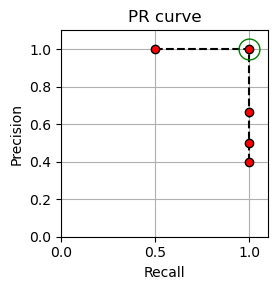

In [19]:
import pandas as pd
from matplotlib import pyplot as plt

def main(top, rel_judgement):
    rel_docs = []

    for doc_id, rel in rel_judgement.items():
        if rel==1:
            rel_docs.append(doc_id)

    retrieved_rel_doc3 = [value for value in list(top.keys()) if value in rel_docs]
    prec3 = len(retrieved_rel_doc3)/len(top)*100
    rec3 = len(retrieved_rel_doc3)/len(rel_docs)*100
    fScore3 = 2 * prec3 * rec3 / (prec3 + rec3)
    print("precision: ", prec3)
    print("recall: ",rec3)
    print("F-score: ", fScore3)

    relevance_score1 = {}
    i = 0
    for doc_id in doc_dict.keys():
        relevance_score1[doc_id] = cosine_sim(TQ[:, 0], TD[:, i])
        i = i + 1

    #relevance_score1 = {'doc1': 0.4641504133851462, 'doc2': 0.0, 'doc3': 0.10856998991379904, 'doc4': 0.35626622628022314, 'doc5': 0.10705617011820337, 'doc6': 0.10856998991379904, 'doc7': 0.7689768599816609, 'doc8': 0.08967792817935699, 'doc9': 0.0, 'doc10': 0.0}
    I = np.array(list(relevance_score1.keys()))
    score = np.array(list(relevance_score1.values()))
    I_Q = np.array([2,3])
    output = compute_prf_metrics(I, score, I_Q)
    P_Q, R_Q, F_Q, BEP, F_max, P_average, X_Q, rank, I_sorted, rank_sorted = output

    # Arrange output as tables
    score_sorted = np.flip(np.sort(score))
    df = pd.DataFrame({'Rank': rank_sorted, 'ID': I_sorted,
                        'Score': score_sorted,
                        '$$ \chi_\mathcal{Q} $$': X_Q,
                        'P(r)': P_Q,
                        'R(r)': R_Q,
                        'F(r)': F_Q})
    print(df)

    print('Break-even point = %.2f' % BEP)
    print('F_max = %.2f' % F_max)
    print('Average precision =', np.round(P_average, 5))
    
    figsize=(3, 3)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    plt.plot(R_Q, P_Q, linestyle='--', marker='o', color='k',
    mfc='r')
    plt.xlim([0, 1.1])
    plt.ylim([0, 1.1])
    ax.set_aspect('equal', 'box')
    plt.title('PR curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.tight_layout()
    ax.plot(BEP, BEP, color='green', marker='o',
    fillstyle='none', markersize=15)
    ax.set_title('PR curve')
    plt.show()

main(top_3, rel_judgement1)